<a href="https://colab.research.google.com/github/Ededu1984/Imersao-dados-2019/blob/main/IMERSAO_DADOS_ENEM_2019_SOROCABA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bibliotecas para analisar os dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import missingno as msno

# ML
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import xgboost as xgb

# Desabilitando warnings
import warnings
warnings.filterwarnings('ignore')

# Lendo o dataset

In [5]:
fonte = "https://github.com/Ededu1984/Imersao-dados-2019/blob/main/MICRODADOS_ENEM_2019_Sorocaba.csv?raw=true"

In [6]:
treino = pd.read_csv(fonte)

In [7]:
treino.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001276802,2019,3552205,Sorocaba,35,SP,27,F,1,1,1,3550308.0,São Paulo,35.0,SP,1,8,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABACCEDAABBEABACCEDBECEAACBBEAACEBBCAAEDABBCE,99999DABBBAABABCBAEECBDDEDADCCBBCEAACEAEBAEECD...,CEBCECECEDAABDDBAECABAEACCDEDCEECEAAADDBCECEB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,140.0,40.0,40.0,140.0,40.0,400.0,B,E,A,A,2,C,A,B,C,B,A,B,A,A,A,B,A,A,B,A,A,C,A,A,B
1,190001293186,2019,3552205,Sorocaba,35,SP,22,F,1,3,1,3147303.0,Paraisópolis,31.0,MG,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,D,C,B,1,C,A,B,B,A,A,B,A,B,A,B,A,A,A,A,A,B,A,B,B
2,190001318522,2019,3552205,Sorocaba,35,SP,25,F,0,1,1,3552205.0,Sorocaba,35.0,SP,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,C,B,4,B,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,C,A,A,B
3,190001570053,2019,3552205,Sorocaba,35,SP,20,F,1,3,1,3542602.0,Registro,35.0,SP,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,B,B,4,H,A,B,C,B,C,B,B,B,B,B,A,A,B,A,B,E,B,B,B
4,190001570074,2019,3552205,Sorocaba,35,SP,34,M,1,1,1,3143401.0,Monte Sião,31.0,MG,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABABADEBCABEBAAADCBEEDBBAEEBBAEDAECEACEAEBCAB,BAEAA99999CDEBAEEDBCCBCCDEDBBCEDEBEADDEEECBDEA...,EEEDDDDBABCCADBACEBEBAEBCADCCEDDEABEECCBCBBAB,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,120.0,140.0,120.0,40.0,540.0,F,F,D,D,2,M,B,D,C,B,A,B,B,B,A,B,A,B,C,B,A,C,A,C,B


In [8]:
treino.shape # Checando dimensão do dataframe

(12919, 136)

In [9]:
treino.columns.values # Checando colunas do dataframe

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [10]:
treino.describe() # Checando informações estatísticas das colunas

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,1.291900e+04,12919.0,12919.0,12919.0,12919.000000,12919.000000,12919.000000,12919.000000,1.265400e+04,12654.000000,12919.000000,12919.000000,12919.000000,7364.000000,12919.000000,3.626000e+03,3.626000e+03,3626.000000,3626.000000,3626.000000,3626.000000,12919.000000,12919.000000,12919.000000,12919.000000,12919.0,12919.000000,12919.000000,12919.000000,12919.000000,12919.000000,12919.000000,12919.000000,12919.000000,12919.000000,12919.000000,12919.000000,12919.0,12919.000000,12919.000000,...,12919.000000,12919.0,12919.0,12919.0,12919.0,12919.000000,12919.000000,12919.000000,12919.0,12919.0,12919.000000,12919.0,12919.0,12919.0,12919.0,12919.000000,12919.0,1.291900e+04,12919.000000,12919.000000,12919.000000,12919.000000,12919.000000,9166.000000,9757.000000,9757.000000,9166.000000,9166.000000,9757.000000,9757.000000,9166.000000,12919.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,12919.000000
mean,1.900038e+11,2019.0,3552205.0,35.0,20.942410,1.074928,1.598498,1.024460,3.518319e+06,34.719772,1.553758,2.570091,1.433702,1.002037,0.093893,3.530889e+07,3.551936e+06,34.998345,2.339768,1.000552,1.008274,0.001238,0.000232,0.000232,0.000929,0.0,0.001548,0.000155,0.001703,0.000464,0.000310,0.000155,0.000387,0.001084,0.000232,0.000464,0.000077,0.0,0.001006,0.000155,...,0.000077,0.0,0.0,0.0,0.0,0.000310,0.000155,0.000077,0.0,0.0,0.000077,0.0,0.0,0.0,0.0,0.000077,0.0,3.552165e+06,35.001703,0.709807,0.757876,0.757876,0.709807,504.515492,508.504356,512.505893,516.514292,501.177689,531.496966,543.772922,557.444032,0.314575,1.092446,124.261556,125.261863,117.253254,124.364046,96.943733,588.084452,3.702144
std,1.364859e+06,0.0,0.0,0.0,6.824391,0.427375,0.953088,0.211211,2.863495e+05,2.824405,0.666846,3.890297,0.625178,0.045090,0.291691,4.037458e+05,1.061262e+04,0.099641,0.751166,0.023482,0.157350,0.035172,0.015237,0.015237,0.030464,0.0,0.039317,0.012442,0.041233,0.021547,0.017594,0.012442,0.019670,0.032903,0.015237,0.021547,0.008798,0.0,0.031707,0.012442,...,0.008798,0.0,0.0,0.0,0.0,0.017594,0.012442,0.008798,0.0,0.0,0.008798,0.0,0.0,0.0,0.0,0.008798,0.0,3.950491e+04,0.396021,0.454210,0.431447,0.431447,0.454210,1.245408,1.200701,1.173758,1.155250,76.404820,77.357509,57.640066,113.405840,0.464365,0.626448,29.988389,40.604110,37.394634,34.959384,57.613875,174.398956,1.325604
min,1.900013e+11,2019.0,3552205.0,35.0,14.000000,0.000000,0.000000,0.000000,1.100023e+06,11.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.903496e+07,2.924009e+06,29.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0

# Checando valores nulos do dataset

In [13]:
# Checando colunas com valores nulos

todos_valores_nulos = (treino.isnull().sum() / len(treino)) * 100
todos_valores_nulos = round(todos_valores_nulos.drop(todos_valores_nulos[todos_valores_nulos == 0].index).sort_values(ascending=False)[:30],2)
valores_nan = pd.DataFrame({'Porcentagem de valores nulos no dataframe (%)' :todos_valores_nulos})
valores_nan.head(40)

,Porcentagem de valores nulos no dataframe (%)
TP_DEPENDENCIA_ADM_ESC,71.93
TP_LOCALIZACAO_ESC,71.93
CO_ESCOLA,71.93
CO_MUNICIPIO_ESC,71.93
NO_MUNICIPIO_ESC,71.93
CO_UF_ESC,71.93
SG_UF_ESC,71.93
TP_SIT_FUNC_ESC,71.93
TP_ENSINO,43.00
CO_PROVA_CN,29.05


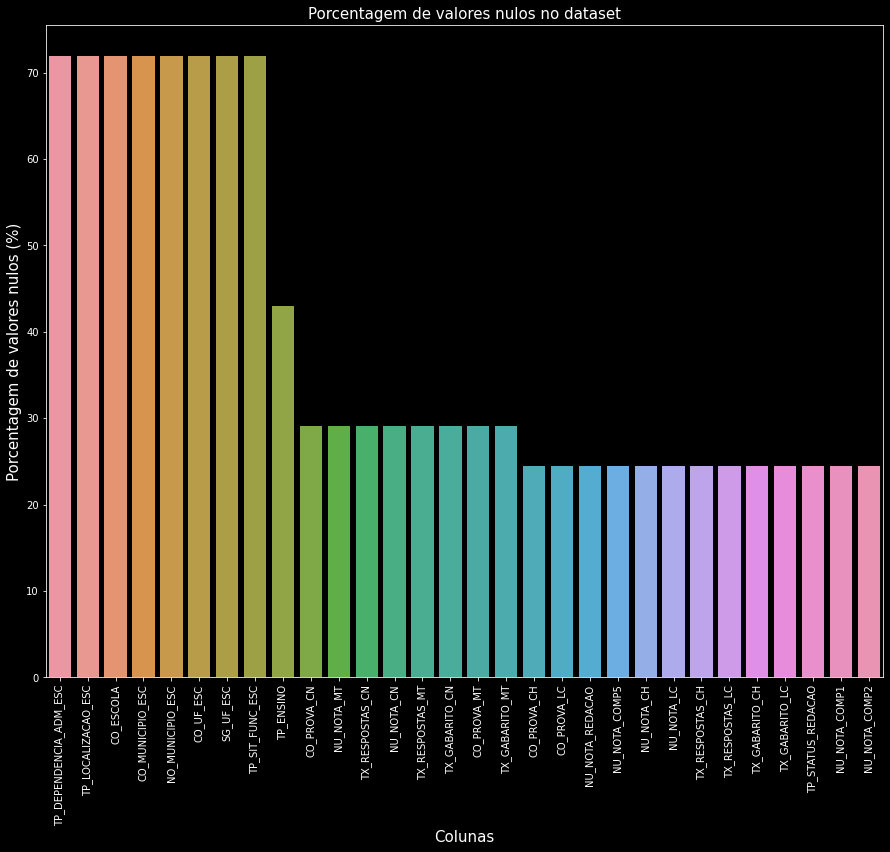

In [39]:
### Verificando porcentagem de valores nulos

f, ax = plt.subplots(figsize=(15, 12))
plt.style.use("dark_background")
plt.xticks(rotation='90')
sns.barplot(x=todos_valores_nulos.index, y=todos_valores_nulos)
plt.xlabel('Colunas', fontsize=15)
plt.ylabel('Porcentagem de valores nulos (%)', fontsize=15)
plt.title('Porcentagem de valores nulos no dataset', fontsize=15)
plt.show()

<Figure size 576x432 with 0 Axes>

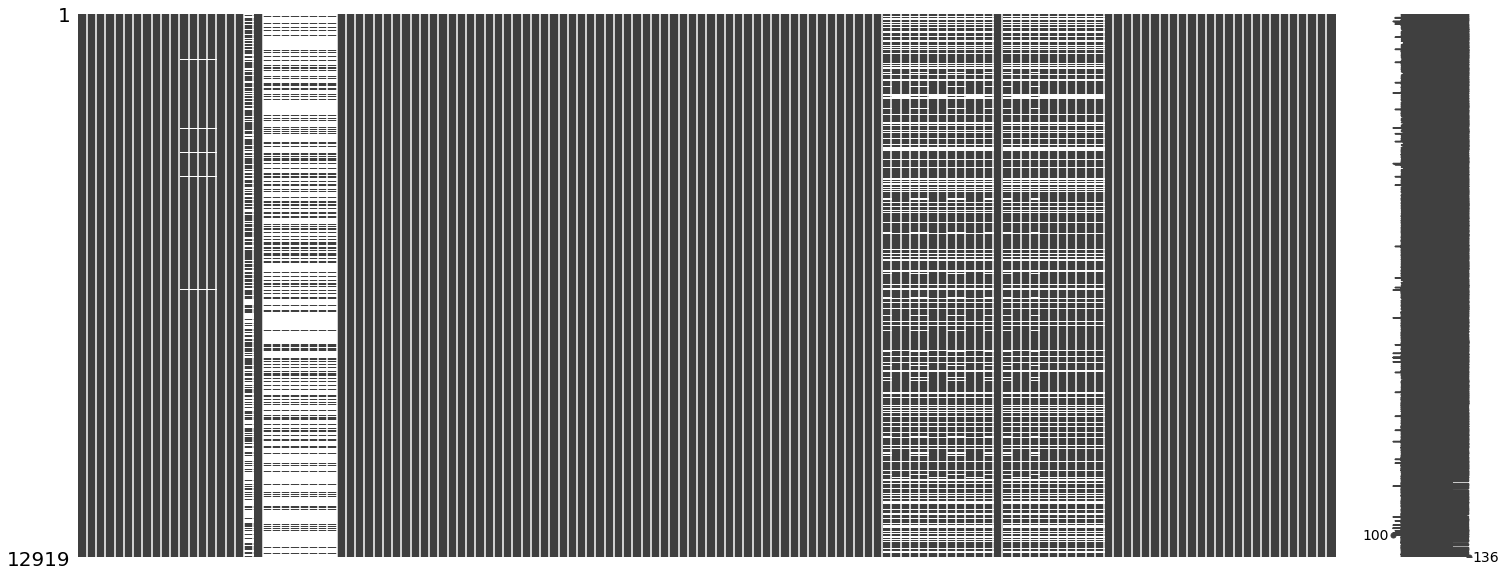

In [14]:
# Visão geral da distribuição de valores nulos no dataset
## As regiões em braco estão preenchidas com NaN

plt.figure(figsize=(8,6))
msno.matrix(treino)
plt.show()

# Adicionando nota total

In [15]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

In [16]:
treino['NU_NOTA_TOTAL'] = treino[provas].sum(axis=1)

In [17]:
notas_sem_zero = treino.query('NU_NOTA_TOTAL > 0')

In [18]:
notas_sem_zero['NU_NOTA_TOTAL'].describe()

count    9773.000000
mean     2653.501995
std       508.350527
min       300.000000
25%      2392.600000
50%      2682.600000
75%      2988.900000
max      4048.200000
Name: NU_NOTA_TOTAL, dtype: float64

In [19]:
# Dados estatísticos das notas das provas

treino[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_TOTAL']].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
count,9166.000000,9757.000000,9166.000000,9757.000000,9757.000000,12919.000000
mean,501.177689,531.496966,557.444032,543.772922,588.084452,2007.328354
std,76.404820,77.357509,113.405840,57.640066,174.398956,1221.748200
min,327.900000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,442.300000,482.800000,462.600000,513.700000,520.000000,1088.550000
50%,501.800000,538.300000,550.350000,550.800000,600.000000,2505.300000
75%,556.900000,584.300000,640.800000,581.700000,680.000000,2880.200000
max,786.100000,781.500000,964.000000,699.500000,980.000000,4048.200000


# Construção das funções utilizadas

In [24]:
def boxplot(df,x,y,x_texto=None,y_texto=None,titulo=None, x_lim=None, y_lim=None):

  plt.style.use("dark_background")  
  ax = sns.boxplot(x=x, y=y, data=df)
  ax.set_xlabel(x_texto, fontsize=16)
  ax.set_ylabel(y_texto, fontsize=16)
  ax.set_xlim(x_lim)
  ax.set_ylim(y_lim)
  plt.title(titulo, fontsize=18)
  #plt.show()

In [25]:
def histograma(x, titulo=None, x_texto=None, y_texto=None, cor=None, barras=None, grade=False):

  plt.style.use("dark_background")
  plt.figure(figsize = (14, 10))
  plt.hist(x = x, bins=barras, edgecolor='black', alpha=0.3, color=cor)
  plt.title(titulo, fontsize=16)
  plt.grid(grade)
  plt.xlabel(x_texto, fontsize=14)
  plt.ylabel(y_texto, fontsize=14)
  plt.show()

In [26]:
def histplot(x, titulo=None, x_texto=None, y_texto=None, cor=None, grade=False):

  plt.style.use("dark_background")
  plt.figure(figsize = (14, 10))
  sns.histplot(x = x, edgecolor='black', alpha=0.3, kde=1, color=cor)
  plt.axvline(x=x.mean(), color='red', linestyle='solid', linewidth=2, label="Média")
  plt.axvline(x=x.median(), color='green', linestyle='solid', linewidth=2, label="Mediana")
  plt.axvline(x=x.value_counts().index[0], color='yellow', linestyle='solid', linewidth=2, label="Moda")
  plt.title(titulo, fontsize=16)
  plt.grid(grade)
  plt.xlabel(x_texto, fontsize=14)
  plt.ylabel(y_texto, fontsize=14)
  plt.legend()
  plt.show()

In [27]:
def barra(x, tipo, titulo=None, grade=None, x_texto=None, y_texto=None):

  plt.style.use("dark_background")
  x.plot(kind=tipo, figsize = (14, 10), edgecolor='black')
  plt.title(titulo, fontsize=16)
  plt.grid(grade)
  plt.xlabel(x_texto, fontsize=14)
  plt.ylabel(y_texto, fontsize=14)
  #plt.show()

# Analisando dados da idade dos inscritos

In [20]:
sorted(treino['NU_IDADE'].unique()) # Checando todas as idades

[14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 70,
 73,
 76,
 80]

In [21]:
# Checando proporção dos inscritos por idade

porcentagem = round(treino['NU_IDADE'].value_counts() / sum(treino['NU_IDADE'].value_counts()) * 100, 4).sort_index()
porcentagem_df = pd.DataFrame({'Proporção dos inscritos por idade (%)' :porcentagem })
porcentagem_df.head(40)

,Proporção dos inscritos por idade (%)
14,0.0155
15,1.0837
16,6.2544
17,30.0565
18,15.6668
19,9.8150
20,6.6336
21,4.7217
22,3.7542
23,3.0420


In [22]:
treino['NU_IDADE'].describe() # Checando dados estatísticos da idade dos inscritos

count    12919.000000
mean        20.942410
std          6.824391
min         14.000000
25%         17.000000
50%         18.000000
75%         22.000000
max         80.000000
Name: NU_IDADE, dtype: float64

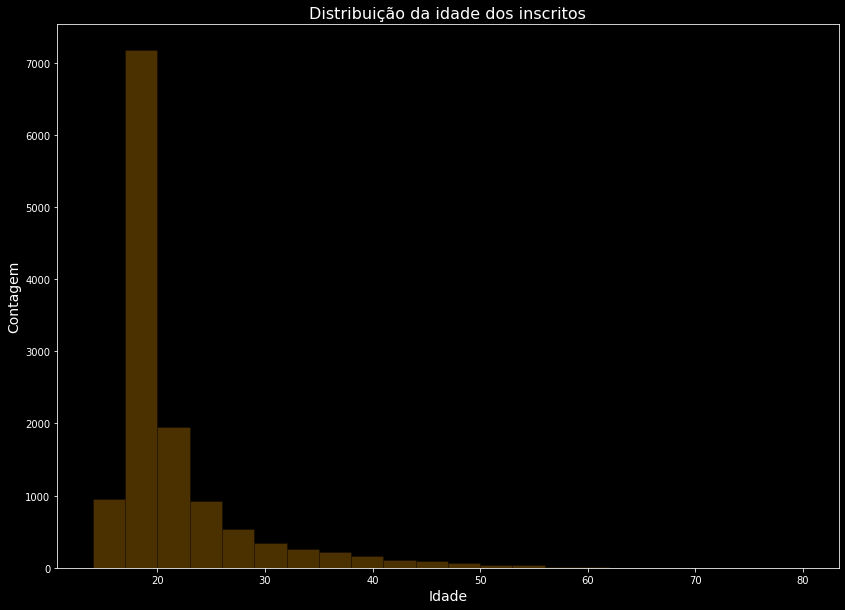

In [29]:
histograma(x = treino["NU_IDADE"], titulo = "Distribuição da idade dos inscritos", x_texto="Idade", y_texto="Contagem", barras = 22, cor="orange")

# Análise pelo tipo de escola

In [30]:
treino_escola = treino.copy()
treino_escola.TP_ESCOLA.replace({1:'Não Respondeu', 2:'Pública', 3:'Privada', 4:'Exterior'}, inplace=True)

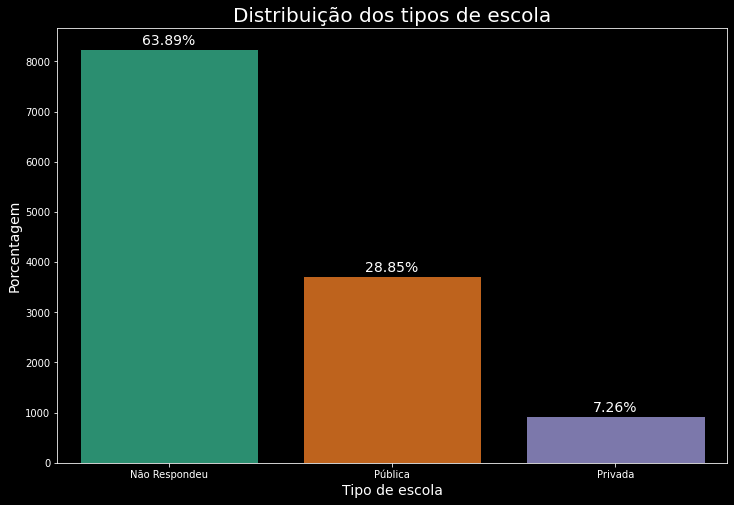

In [31]:
plt.figure(figsize=(12,8))
count=sns.countplot(treino_escola.TP_ESCOLA, edgecolor='black', palette="Dark2")
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),fontsize=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.xlabel('Tipo de escola', fontsize=14)
plt.ylabel('Porcentagem', fontsize=14)
plt.title('Distribuição dos tipos de escola', fontsize=20)
plt.show()

In [32]:
notas_provas = ['NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_CH', 'NU_NOTA_REDACAO', 'NU_NOTA_TOTAL']
tipo_escola = ['Não Respondeu', 'Pública', 'Privada']
grupo_escola = treino_escola.groupby('TP_ESCOLA').agg('mean')
grupo_escola2 = grupo_escola.loc[tipo_escola, notas_provas]

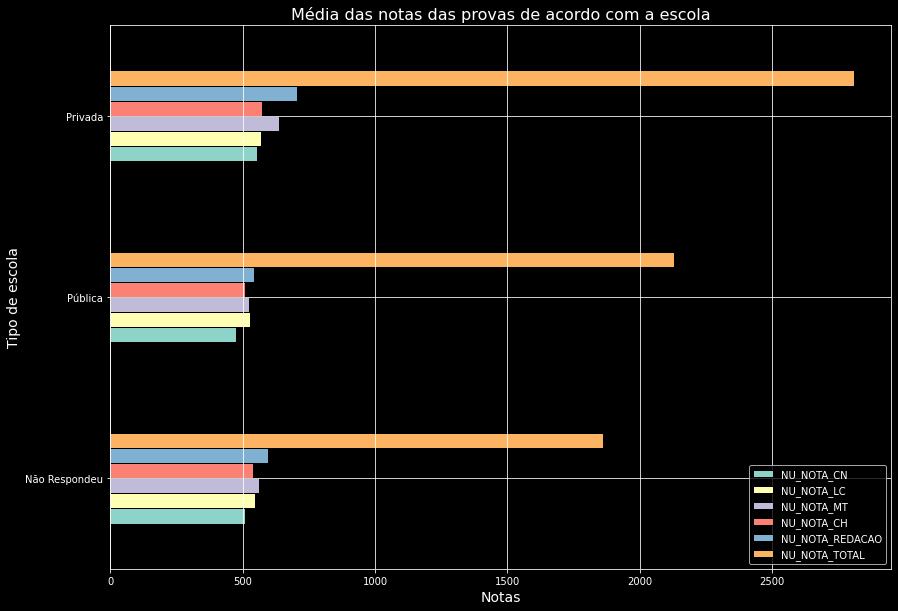

In [33]:
barra(grupo_escola2, tipo="barh", titulo= "Média das notas das provas de acordo com a escola",x_texto="Notas", y_texto="Tipo de escola")

# Comparando inscritos com internet e sem internet

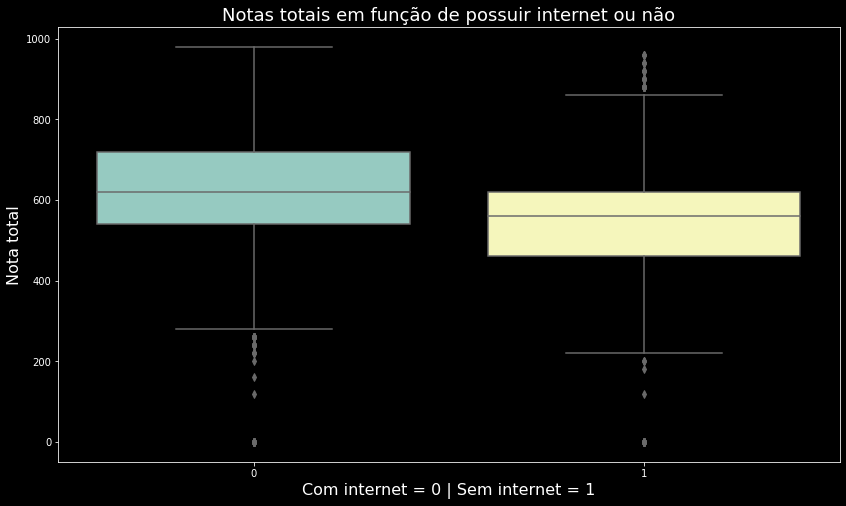

In [34]:
plt.figure(figsize=(14,8))
boxplot(df = treino, x=treino.TP_LINGUA, y=treino.NU_NOTA_REDACAO, titulo = "Notas totais em função de possuir internet ou não", x_texto = "Com internet = 0 | Sem internet = 1", y_texto="Nota total")

# Comparar distribuições das provas em inglês e espanhol

<Figure size 720x720 with 0 Axes>

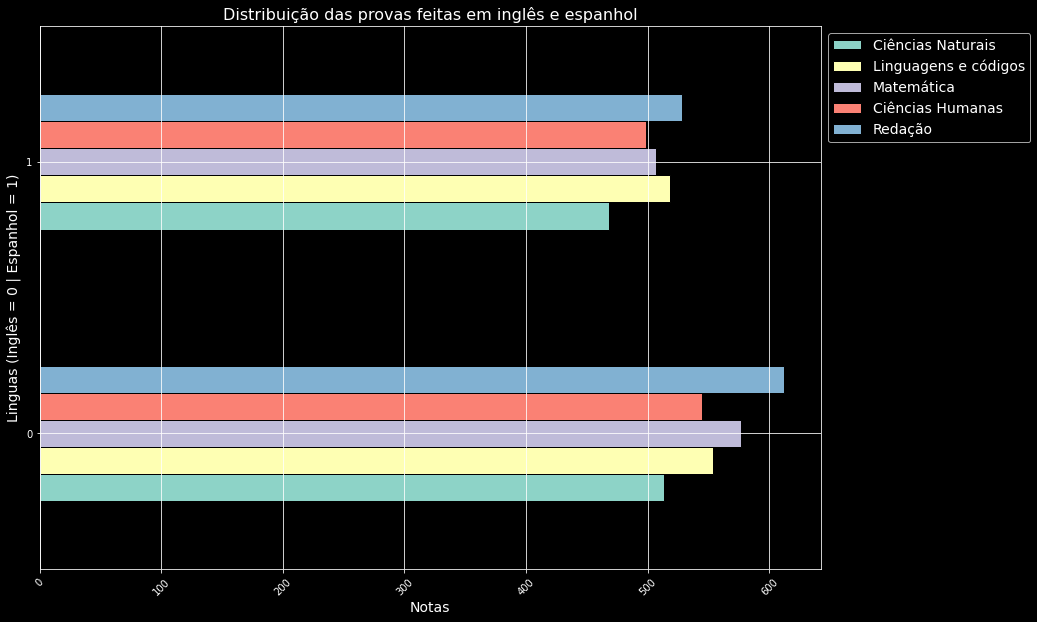

In [38]:
notas_provas = ['NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_CH', 'NU_NOTA_REDACAO']
lingua = [0, 1]
grupo_lingua = treino.groupby('TP_LINGUA').agg('mean')
grupo_lingua2 = grupo_lingua.loc[lingua, notas_provas]


plt.style.use("dark_background")
plt.figure(figsize=(10,10))
grupo_lingua2.plot(kind='barh',figsize=(14,10), edgecolor='black')
plt.legend(['Ciências Naturais', 'Linguagens e códigos', 'Matemática', 'Ciências Humanas', 'Redação'], fontsize=14, bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Distribuição das provas feitas em inglês e espanhol', size=16)
plt.xticks(rotation=45)
plt.xlabel('Notas', fontsize=14)
plt.ylabel('Linguas (Inglês = 0 | Espanhol = 1)', fontsize=14)
plt.grid(True)
plt.show()

# Avaliando treineiros e não treineiros

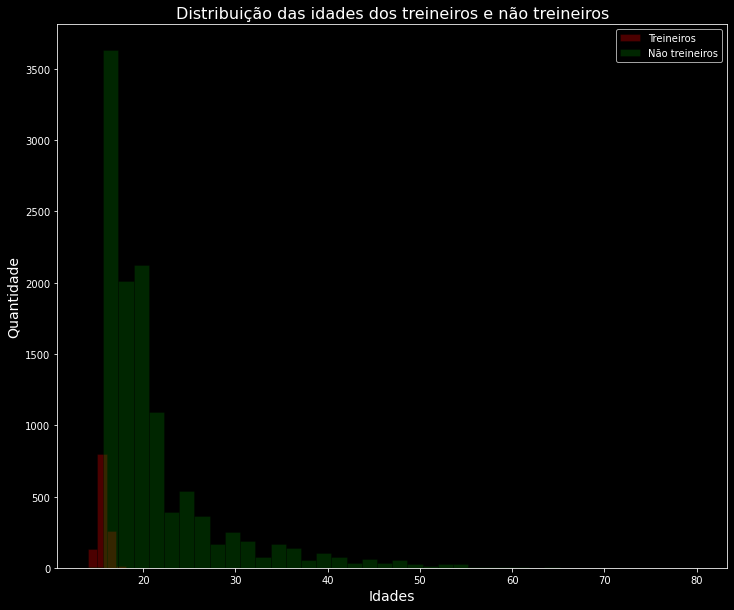

In [40]:
# Distribuição das idades dos treineiros e não treineiros
## Primeira visualização

# Treineiros
treino.query('IN_TREINEIRO == 1')['NU_IDADE'].hist(bins=40, figsize=(8,8), edgecolor='black', alpha=0.3, color="red")

# Não treineiros
treino.query('IN_TREINEIRO == 0')['NU_IDADE'].hist(bins=40, figsize=(12,10), edgecolor='black', alpha=0.3,  color="green")

plt.style.use("dark_background")
plt.grid(False)
plt.title('Distribuição das idades dos treineiros e não treineiros', fontsize=16)
plt.xlabel('Idades', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
plt.legend(['Treineiros','Não treineiros'])
plt.show()

# Avaliação Notas em função da renda familiar

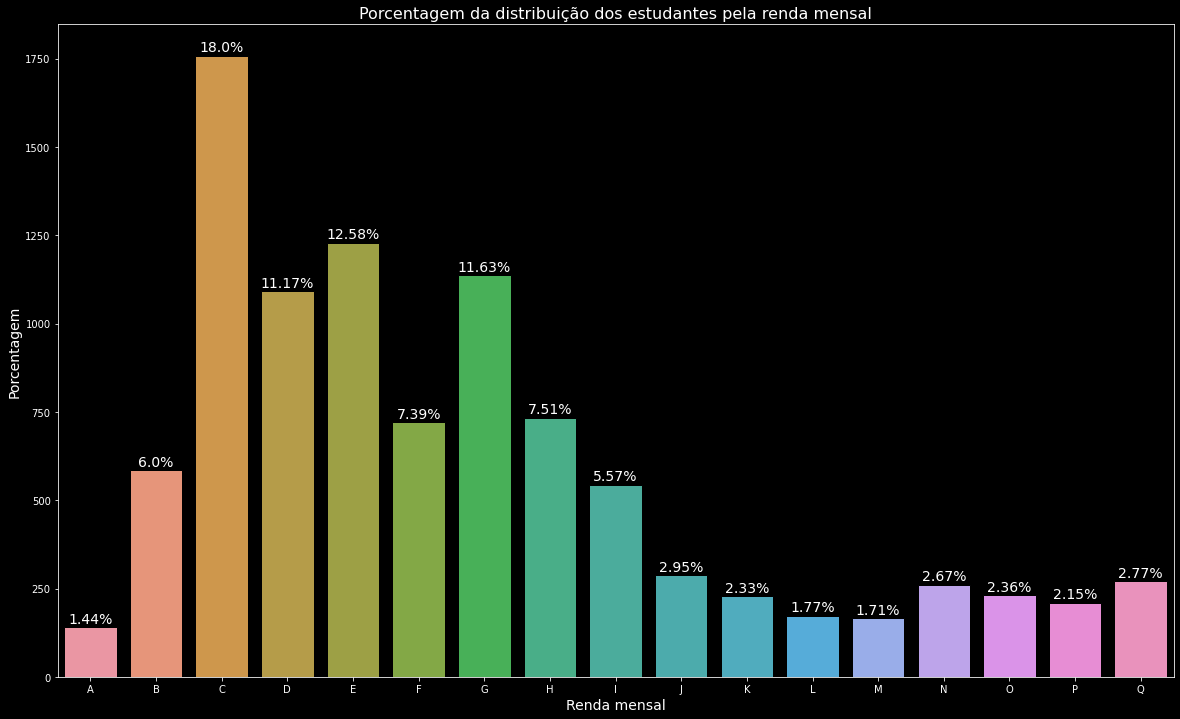

In [41]:
plt.style.use("dark_background")
plt.figure(figsize=(20,12))
count=sns.countplot(notas_sem_zero['Q006'].sort_values() ,edgecolor = 'black')
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),size=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.title('Porcentagem da distribuição dos estudantes pela renda mensal', size=16)
plt.xlabel('Renda mensal', fontsize=14)
plt.ylabel('Porcentagem', fontsize=14)
plt.show()

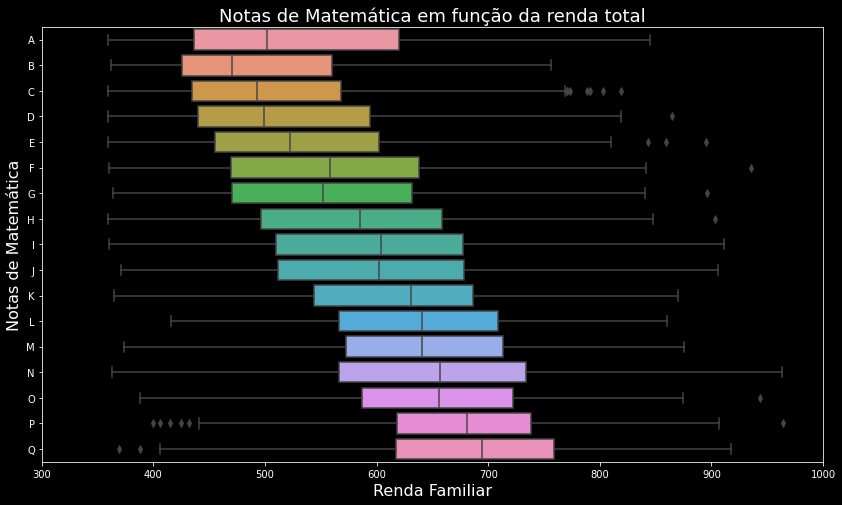

In [42]:
plt.figure(figsize=(14,8))
boxplot(notas_sem_zero, notas_sem_zero['NU_NOTA_MT'], notas_sem_zero['Q006'].sort_values(), "Renda Familiar", "Notas de Matemática", titulo="Notas de Matemática em função da renda total", x_lim=(300,1000))       

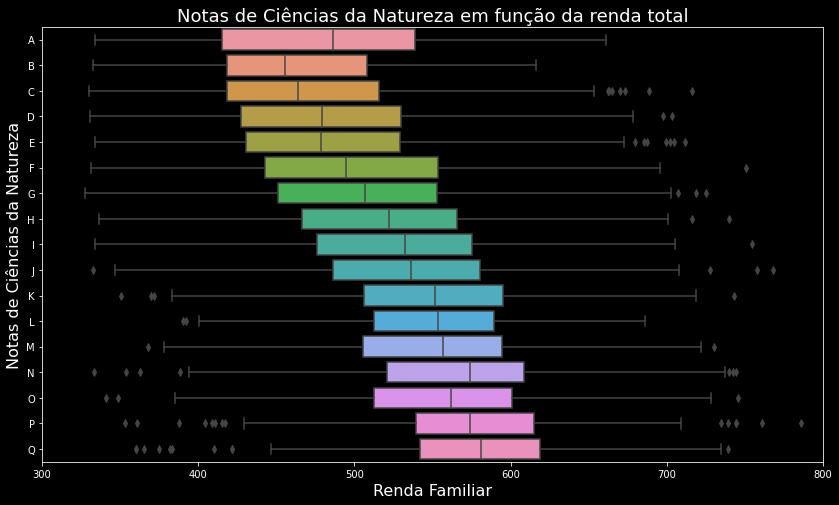

In [43]:
plt.figure(figsize=(14,8))
boxplot(notas_sem_zero, notas_sem_zero['NU_NOTA_CN'], notas_sem_zero['Q006'].sort_values(), "Renda Familiar", "Notas de Ciências da Natureza", titulo= "Notas de Ciências da Natureza em função da renda total" , x_lim=(300,800)) 

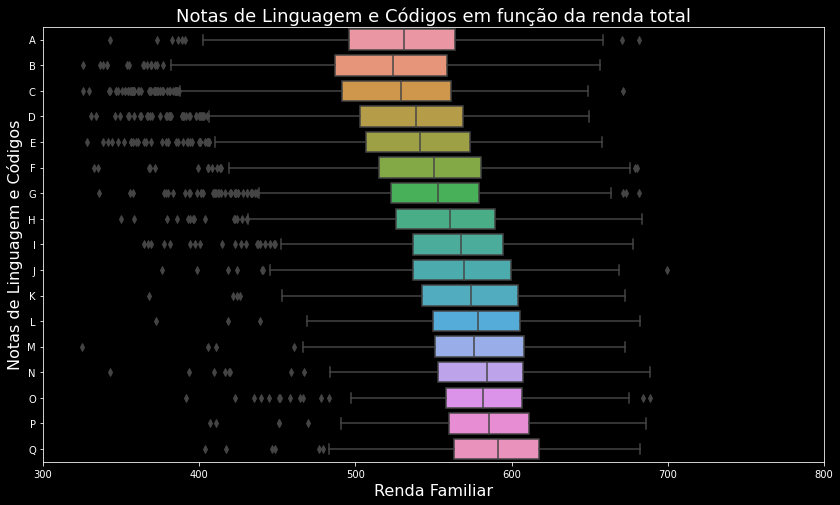

In [44]:
plt.figure(figsize=(14,8))
boxplot(notas_sem_zero, notas_sem_zero['NU_NOTA_LC'], notas_sem_zero['Q006'].sort_values(), "Renda Familiar", "Notas de Linguagem e Códigos", titulo= "Notas de Linguagem e Códigos em função da renda total" , x_lim=(300,800))    

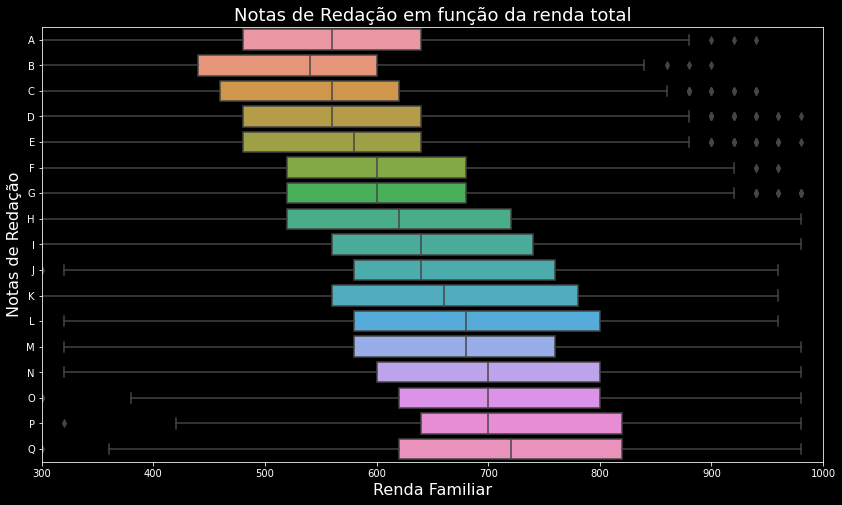

In [45]:
plt.figure(figsize=(14,8))
boxplot(notas_sem_zero, notas_sem_zero['NU_NOTA_REDACAO'], notas_sem_zero['Q006'].sort_values(), "Renda Familiar", "Notas de Redação", titulo= "Notas de Redação em função da renda total" , x_lim=(300,1000))    

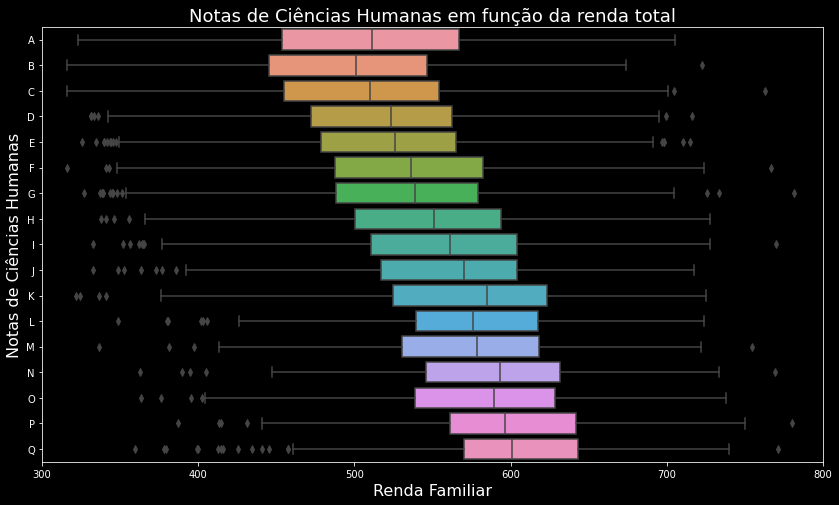

In [46]:
plt.figure(figsize=(14,8))
boxplot(notas_sem_zero, notas_sem_zero['NU_NOTA_CH'], notas_sem_zero['Q006'].sort_values(), "Renda Familiar", "Notas de Ciências Humanas", titulo= "Notas de Ciências Humanas em função da renda total" , x_lim=(300,800))     

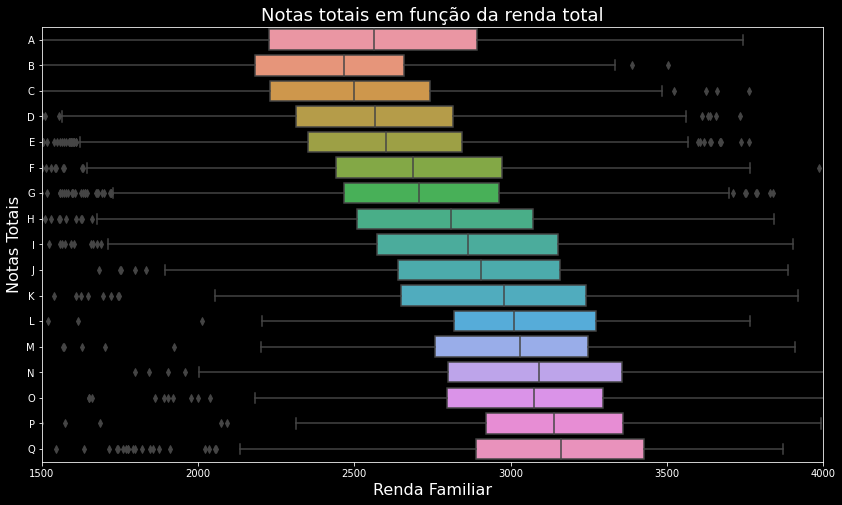

In [47]:
plt.figure(figsize=(14,8))
boxplot(notas_sem_zero, notas_sem_zero['NU_NOTA_TOTAL'], notas_sem_zero['Q006'].sort_values(), "Renda Familiar", "Notas Totais", titulo= "Notas totais em função da renda total" , x_lim=(1500,4000))  

In [48]:
treino['NU_NOTA_TOTAL'] = treino[provas].sum(axis=1)

In [49]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO','NU_NOTA_TOTAL']

In [50]:
renda_ordenada = treino['Q006'].unique()
renda_ordenada.sort()

In [51]:
notas_sem_zero = treino.query('NU_NOTA_TOTAL > 0')

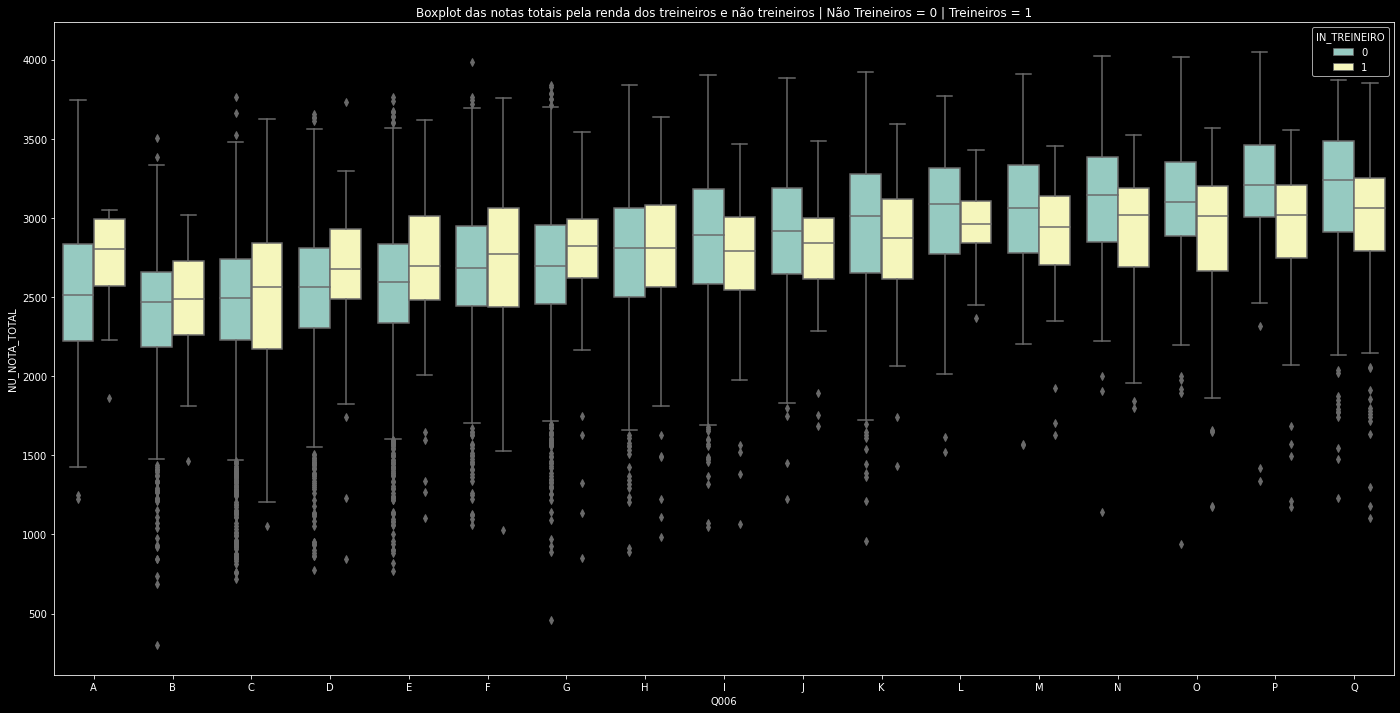

In [52]:
plt.style.use("dark_background")
plt.figure(figsize=(24,12))
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data=notas_sem_zero, 
order = renda_ordenada, hue='IN_TREINEIRO')
plt.title('Boxplot das notas totais pela renda dos treineiros e não treineiros | Não Treineiros = 0 | Treineiros = 1')
plt.show()

# Avaliando inscritos pela raça

In [53]:
grupo_raca = treino.groupby('TP_COR_RACA').NU_NOTA_REDACAO.agg(['max', 'mean'])
grupo_raca

,max,mean
TP_COR_RACA,,
0,960.0,595.795455
1,980.0,604.620360
2,940.0,533.190184
3,960.0,553.509813
4,960.0,618.578199
5,740.0,481.764706


<Figure size 1008x576 with 0 Axes>

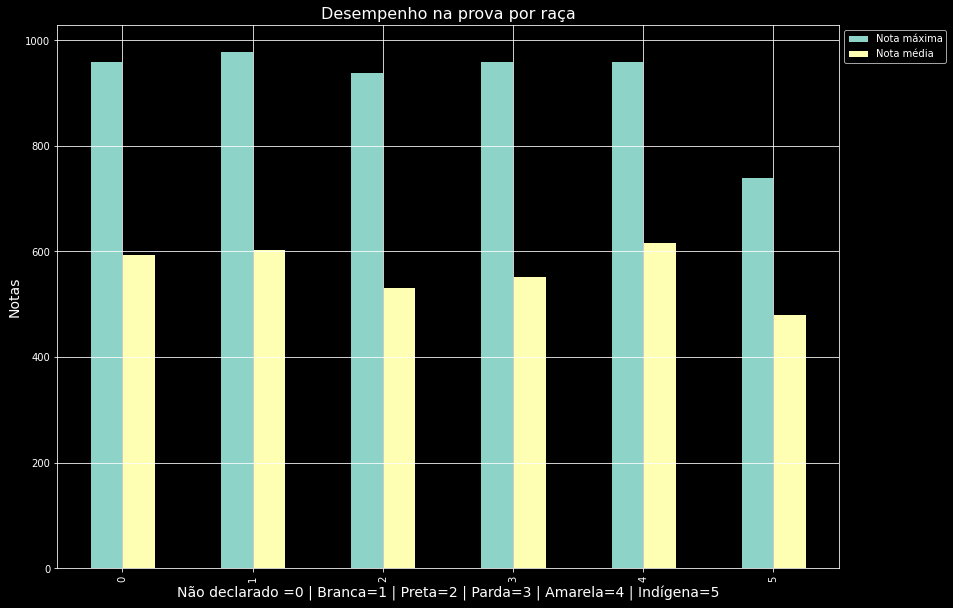

In [54]:
plt.figure(figsize = (14, 8))
barra(x=grupo_raca, tipo='bar', titulo="Desempenho na prova por raça", x_texto="Não declarado =0 | Branca=1 | Preta=2 | Parda=3 | Amarela=4 | Indígena=5", y_texto="Notas")
plt.legend(['Nota máxima', 'Nota média'], bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

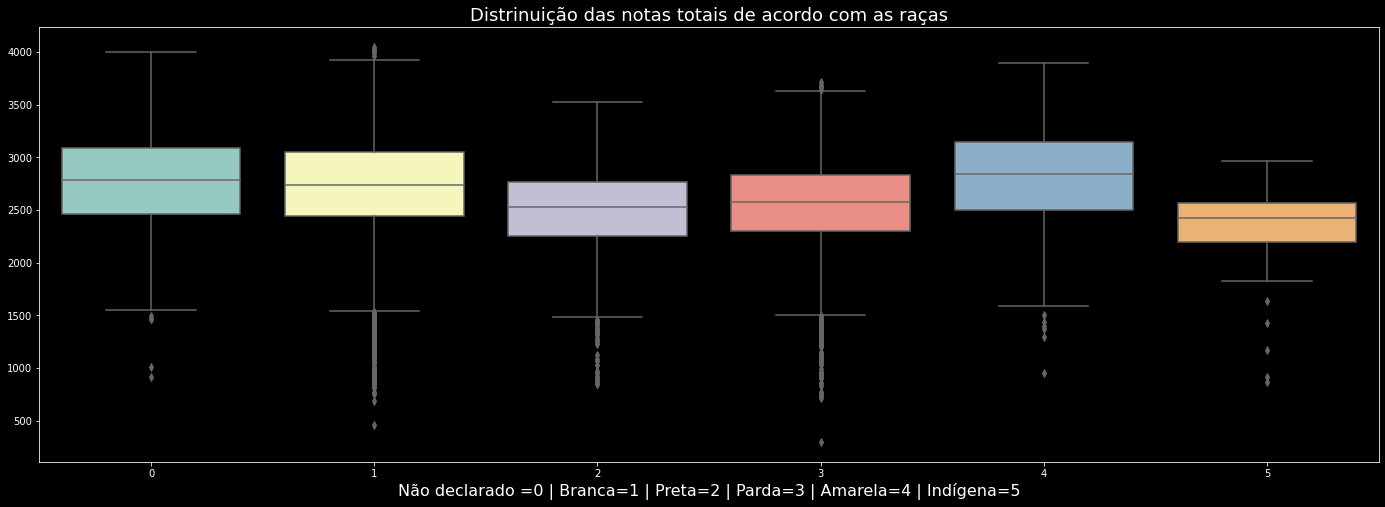

In [55]:
plt.figure(figsize = (24, 8))
boxplot(df=notas_sem_zero, x=notas_sem_zero['TP_COR_RACA'], y=notas_sem_zero['NU_NOTA_TOTAL'], titulo="Distrinuição das notas totais de acordo com as raças", x_texto="Não declarado =0 | Branca=1 | Preta=2 | Parda=3 | Amarela=4 | Indígena=5")
plt.show()

In [56]:
contagem_raca = treino.groupby('TP_COR_RACA').NU_NOTA_REDACAO.agg(['count'])
contagem_raca

,count
TP_COR_RACA,
0,176
1,6493
2,652
3,2191
4,211
5,34


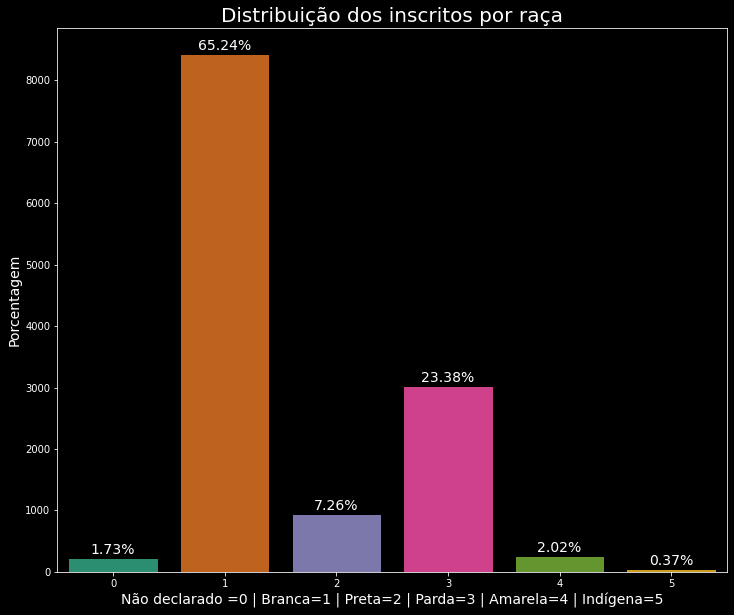

In [57]:
plt.figure(figsize=(12,10))
count=sns.countplot(treino["TP_COR_RACA"], edgecolor='black', palette="Dark2")
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),fontsize=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.xlabel('Não declarado =0 | Branca=1 | Preta=2 | Parda=3 | Amarela=4 | Indígena=5', fontsize=14)
plt.ylabel('Porcentagem', fontsize=14)
plt.title('Distribuição dos inscritos por raça', fontsize=20)
plt.show()

# Avaliando notas pelo sexo

In [58]:
grupo_genero = treino.groupby('TP_SEXO').NU_NOTA_REDACAO.agg(['max', 'mean'])
grupo_genero

,max,mean
TP_SEXO,,
F,980.0,598.550160
M,980.0,573.735115


<Figure size 1008x576 with 0 Axes>

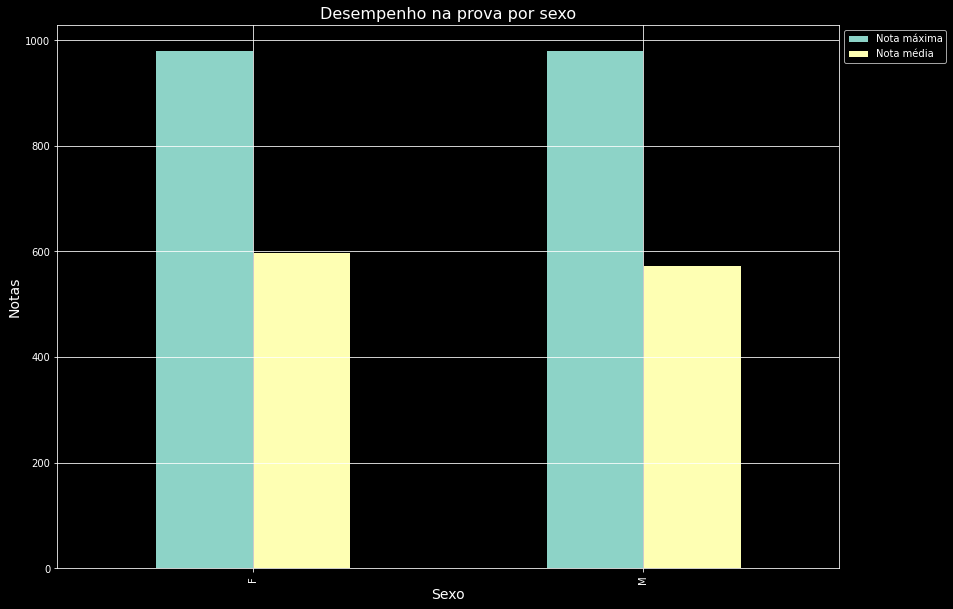

In [59]:
plt.figure(figsize = (14, 8))
barra(x=grupo_genero, tipo='bar', titulo="Desempenho na prova por sexo", x_texto="Sexo", y_texto="Notas")
plt.legend(['Nota máxima', 'Nota média'], bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

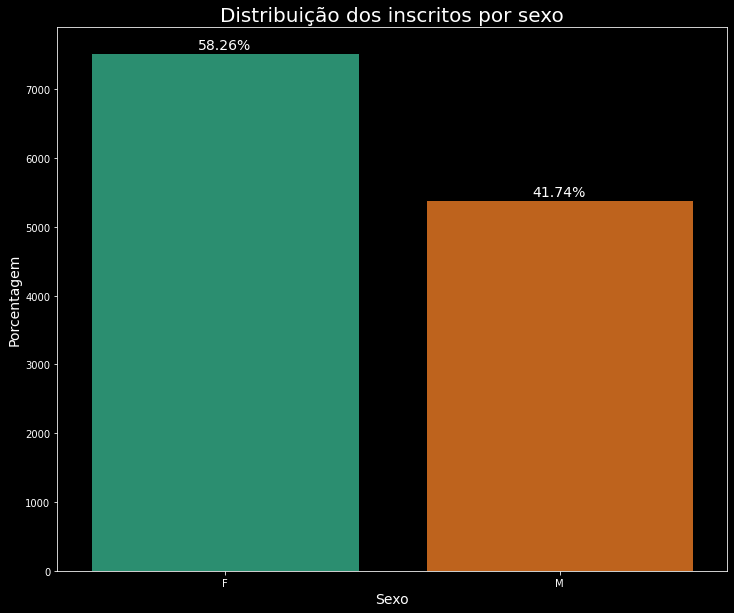

In [60]:
plt.figure(figsize=(12,10))
count=sns.countplot(treino["TP_SEXO"], edgecolor='black', palette="Dark2")
dist_sum=sum([patch.get_height() for patch in  count.patches])
for patch in count.patches:
    count.annotate("{}%".format(np.round((patch.get_height()/dist_sum)*100,2)), (patch.get_x() + patch.get_width() / 2., patch.get_height()),fontsize=14,
                    xytext = (0, 8), textcoords ='offset points', ha='center', va='center')

plt.xlabel('Sexo', fontsize=14)
plt.ylabel('Porcentagem', fontsize=14)
plt.title('Distribuição dos inscritos por sexo', fontsize=20)
plt.show()

# Alunos fizeram a prova em locais diferentes do de residência

In [61]:
contagem_dif_cidade = treino.query('CO_MUNICIPIO_RESIDENCIA != CO_MUNICIPIO_PROVA').count()[0]
contagem_mesma_cidade = treino.count()[0] - contagem_dif_cidade

porcentagem_dif_cidade = round(contagem_dif_cidade/contagem_mesma_cidade*100,2)

print('O número de alunos que fez a prova em uma cidade diferente da cidade de residência é {} e equivale a {}%'.format(contagem_dif_cidade,porcentagem_dif_cidade))

O número de alunos que fez a prova em uma cidade diferente da cidade de residência é 194 e equivale a 1.52%


In [81]:
# Cidades onde os 194 inscritos residentes de Sorocaba que não fizeram a prova em Sorocaba

treino.query('CO_MUNICIPIO_PROVA != 3552205')['NO_MUNICIPIO_PROVA'].unique()

array(['Teixeira de Freitas', 'Belo Horizonte', 'Belo Oriente', 'Tatuí',
       'Votorantim', 'Itapetininga', 'Jardim', 'Indaiatuba', 'São Paulo',
       'Araçoiaba da Serra', 'Bauru', 'Campinas', 'Boituva', 'Paraty',
       'Socorro', 'Itu', 'Salto de Pirapora', 'Fernandópolis',
       'Juiz de Fora', 'Ibiúna', 'Porto Feliz', 'Itapeva', 'Pilar do Sul',
       'Pelotas', 'Mairinque', 'Osasco', 'Avaré', 'São José dos Campos',
       'Taboão da Serra', 'Itaquaquecetuba', 'Várzea Paulista',
       'Santo André', 'Capão Bonito', 'São Roque', 'Curitiba',
       'Ribeirão Preto', 'Piraju', 'Foz do Iguaçu', 'Salto', 'Blumenau',
       'Artur Nogueira', 'Santo Antônio da Platina',
       'Presidente Prudente', 'Itaí', 'Paraguaçu Paulista',
       'São Miguel Arcanjo', 'Sertãozinho', 'São João da Boa Vista',
       'Guarujá', 'Florianópolis', 'Fortaleza', 'Ouro Preto',
       'Rio Branco', 'Teresina', 'São Carlos', 'Itararé', 'Apiaí',
       'Cabreúva', 'Barueri', 'Piracicaba', 'Cerquilho'], dt

# Verificar se quem zerou a prova foi eliminado ou não estava presente

In [84]:
faltante = treino.loc[treino['NU_NOTA_TOTAL'] == 0 , ['NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_TOTAL']]

<Figure size 576x432 with 0 Axes>

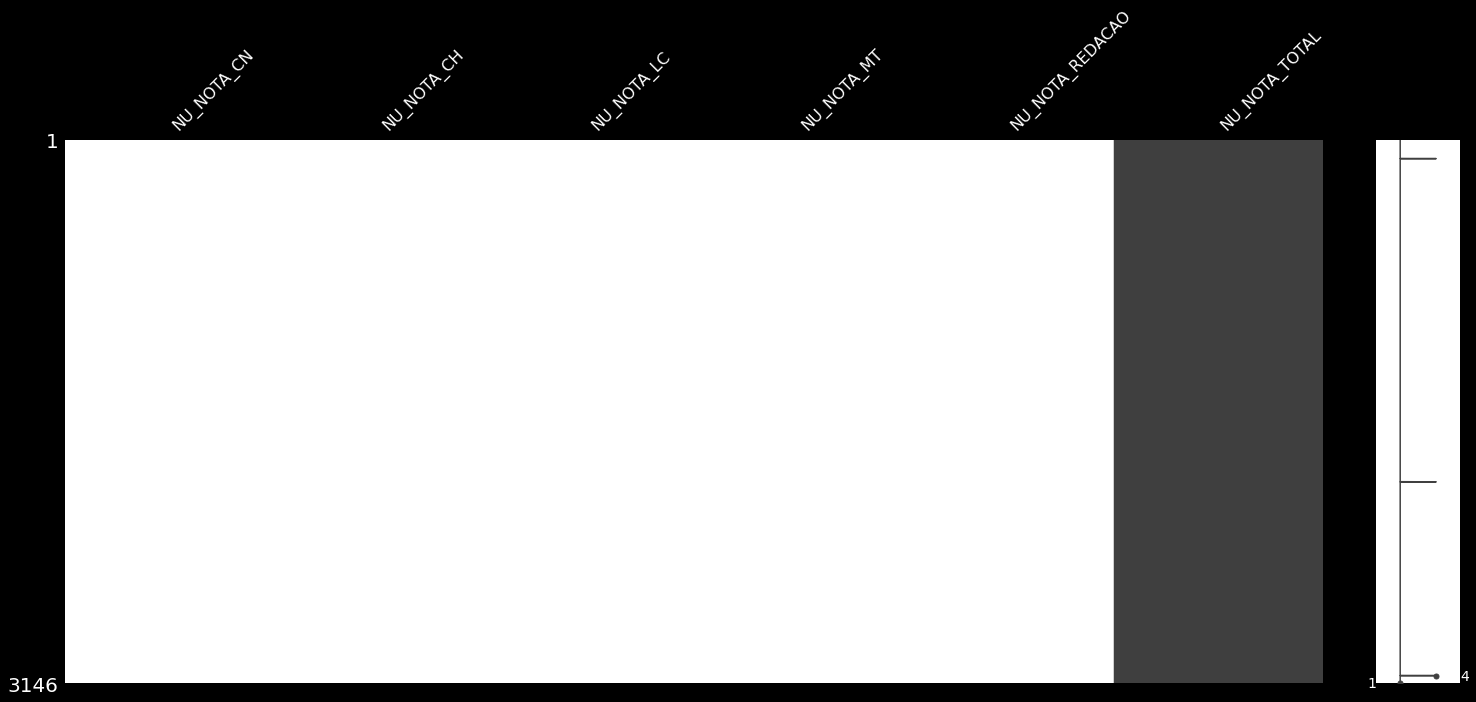

In [85]:
# Os alunos que tiraram zero na grande maioria não fizeram a prova (prenchidos com Nan)

plt.figure(figsize=(8,6))
msno.matrix(faltante)
plt.show()

In [86]:
alunos_zerados = treino.loc[treino['NU_NOTA_TOTAL'] == 0 , ['NU_INSCRICAO','NU_NOTA_CN','NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO','NU_NOTA_TOTAL']]

In [88]:
# Todos que tiraram zero em Sorocaba não foram fazer a prova

alunos_zerados.dropna()

,NU_INSCRICAO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_TOTAL


# Avaliando desistências no ENEM 2019 após primeiro dia

In [89]:
LC = treino['TP_PRESENCA_LC'].value_counts()
CH = treino['TP_PRESENCA_CH'].value_counts()
MT = treino['TP_PRESENCA_MT'].value_counts()
CN = treino['TP_PRESENCA_CN'].value_counts()

colunas = [0,1]
linhas = ['TP_PRESENCA_LC','TP_PRESENCA_CH', 'TP_PRESENCA_MT', 'TP_PRESENCA_CN']
presenca_total = pd.DataFrame([LC, CH, MT, CN])



grupo_presenca = presenca_total.loc[linhas, colunas]
grupo_presenca

,0,1
TP_PRESENCA_LC,3145,9757
TP_PRESENCA_CH,3145,9757
TP_PRESENCA_MT,3751,9166
TP_PRESENCA_CN,3751,9166


## Porcentagem do aumento de ausências do primeiro para o segundo dia de prova

In [90]:
aumento_faltantes = round((grupo_presenca[0][3] / grupo_presenca[0][1] -1)*100,2)

print("O número de faltantes do primeiro para o segundo dia de prova aumento {}%".format(aumento_faltantes))

O número de faltantes do primeiro para o segundo dia de prova aumento 19.27%


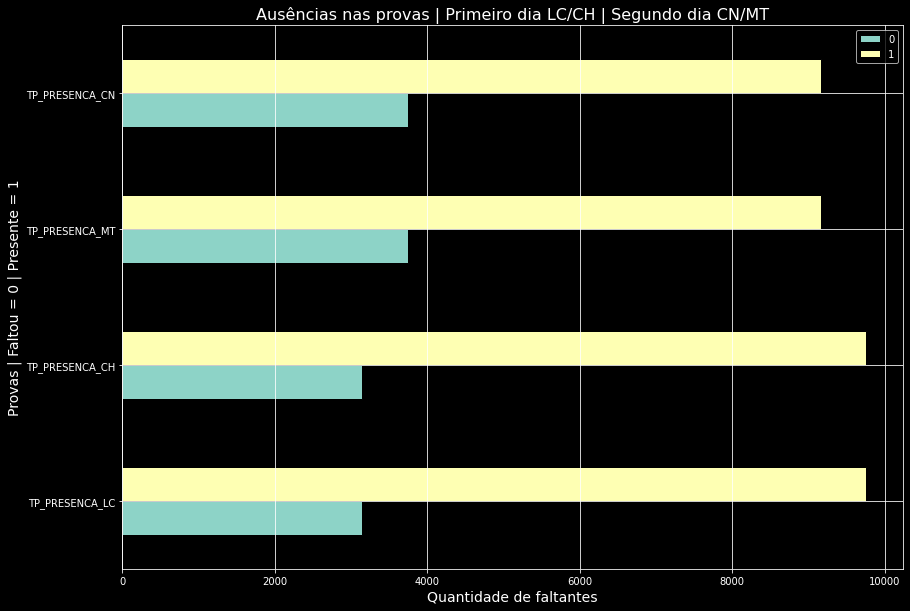

In [91]:
barra(grupo_presenca, tipo="barh", titulo= "Ausências nas provas | Primeiro dia LC/CH | Segundo dia CN/MT",x_texto="Quantidade de faltantes", y_texto="Provas | Faltou = 0 | Presente = 1")

## Faltantes do segundo dia

In [92]:
faltantes_CN = treino.query('TP_PRESENCA_CN == 0').shape[0]
faltantes_MT = treino.query('TP_PRESENCA_MT == 0').shape[0]

print('Os inscritos ausentes em ciências da natureza e matemática foram respectivamente {} e {}'.format(faltantes_CN,faltantes_MT))

Os inscritos ausentes em ciências da natureza e matemática foram respectivamente 3751 e 3751


# Avaliação dos inscritos quanto a quantidade de computadores na casa

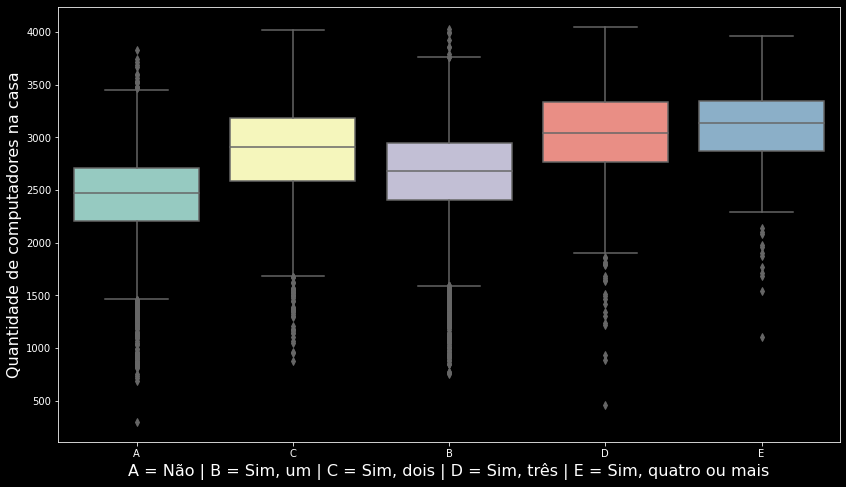

In [94]:
plt.figure(figsize=(14,8))
boxplot(df=notas_sem_zero, x='Q024', y='NU_NOTA_TOTAL', x_texto="A = Não | B = Sim, um | C = Sim, dois | D = Sim, três | E = Sim, quatro ou mais", y_texto="Quantidade de computadores na casa")

# Histogramas das notas

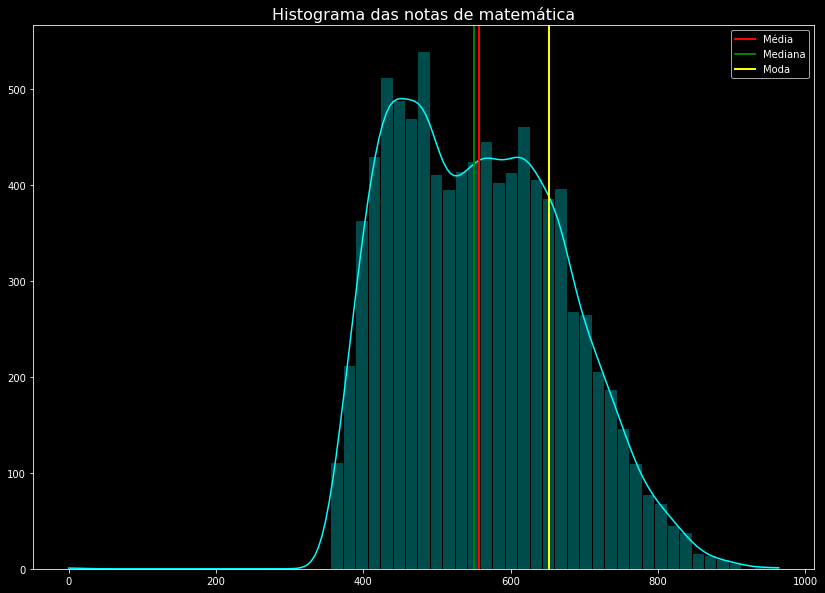

In [95]:
histplot(x=notas_sem_zero['NU_NOTA_MT'], titulo="Histograma das notas de matemática", cor='cyan')

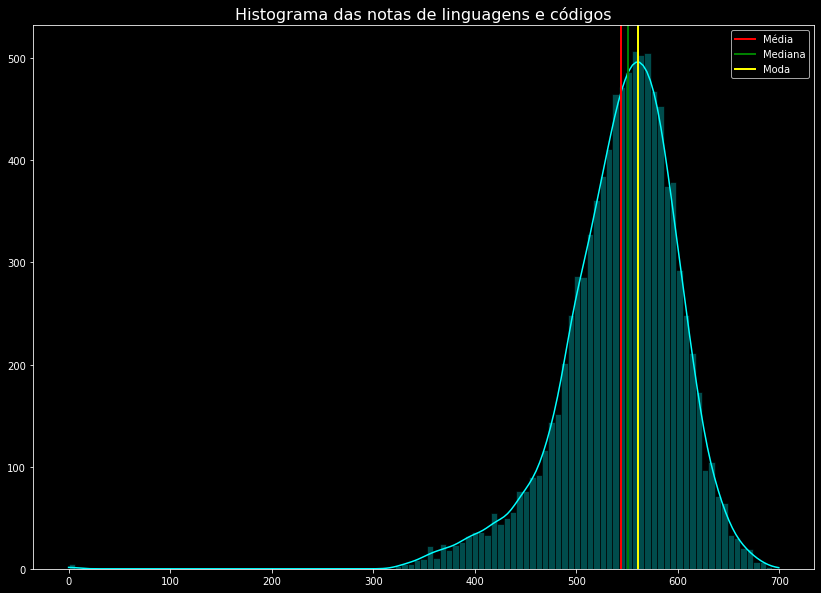

In [96]:
histplot(x=notas_sem_zero['NU_NOTA_LC'], titulo="Histograma das notas de linguagens e códigos", cor='cyan')

In [97]:
### No histograma das notas de ciências humanas mesmo a variável notas_sem_zero ter considerado as notas totais maiores que 0, ainda assim, a maior quantidade de notas de ciências naturais foi 0. Neste caso, foram plotados dois histogramas.

notasCH_sem_zero = notas_sem_zero.query('NU_NOTA_CH > 0')
notasCH_sem_zero['NU_NOTA_CH'].value_counts().index[0]

551.3

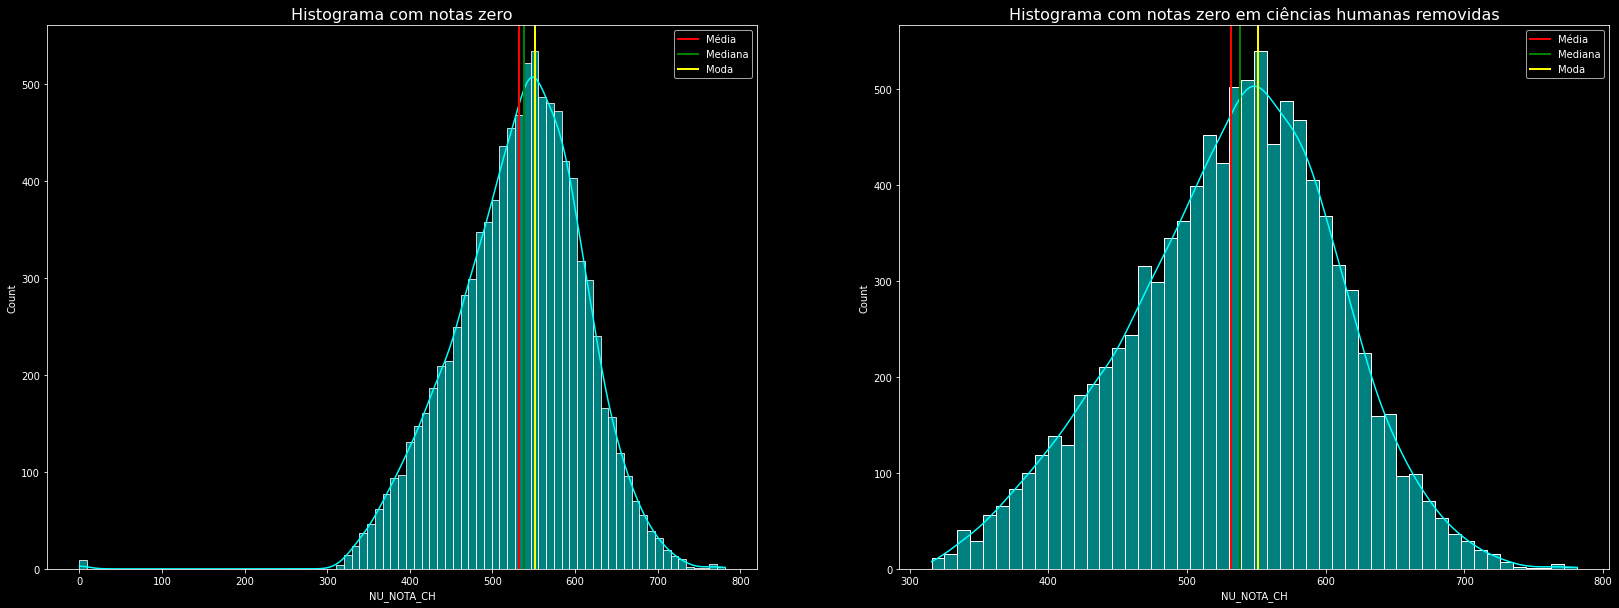

In [98]:

plt.figure(figsize=(28,10))
plt.subplot(1, 2, 1)
sns.histplot(notas_sem_zero, x='NU_NOTA_CH', kde=1, color='cyan')
plt.title("Histograma com notas zero", fontsize=16)
plt.axvline(notas_sem_zero['NU_NOTA_CH'].mean(), color='red', linestyle='solid', linewidth=2, label="Média")
plt.axvline(notas_sem_zero['NU_NOTA_CH'].median(), color='green', linestyle='solid', linewidth=2, label="Mediana")
plt.axvline(notas_sem_zero['NU_NOTA_CH'].value_counts().index[0], color='yellow', linestyle='solid', linewidth=2, label="Moda")
plt.legend()
#

# Histograma com notas zero em ciências humanas removidas
plt.subplot(1, 2, 2)
sns.histplot(notasCH_sem_zero, x='NU_NOTA_CH', kde=1, color='cyan')
plt.title("Histograma com notas zero em ciências humanas removidas", fontsize=16)
plt.axvline(notasCH_sem_zero['NU_NOTA_CH'].mean(), color='red', linestyle='solid', linewidth=2, label="Média")
plt.axvline(notasCH_sem_zero['NU_NOTA_CH'].median(), color='green', linestyle='solid', linewidth=2, label="Mediana")
plt.axvline(notasCH_sem_zero['NU_NOTA_CH'].value_counts().index[0], color='yellow', linestyle='solid', linewidth=2, label="Moda")
plt.legend()
plt.show()


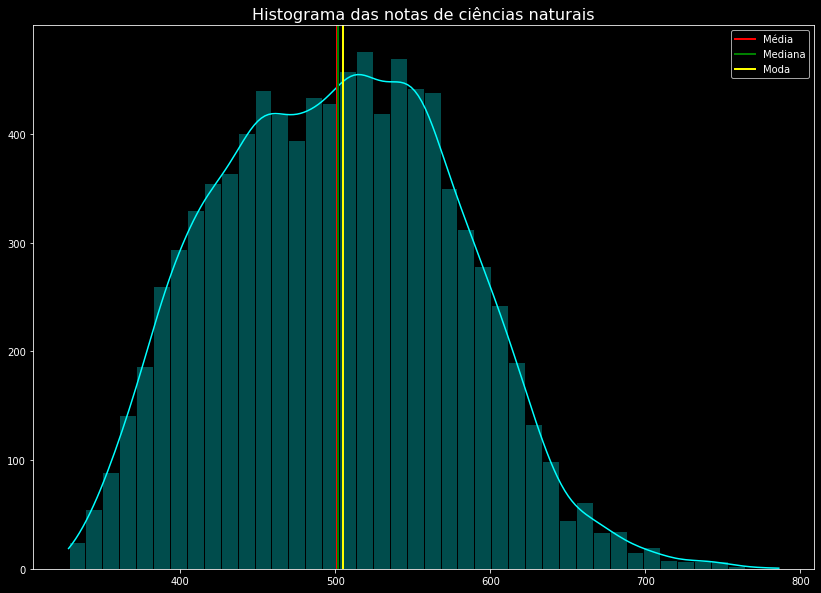

In [99]:
histplot(x=notas_sem_zero['NU_NOTA_CN'], titulo="Histograma das notas de ciências naturais", cor='cyan')

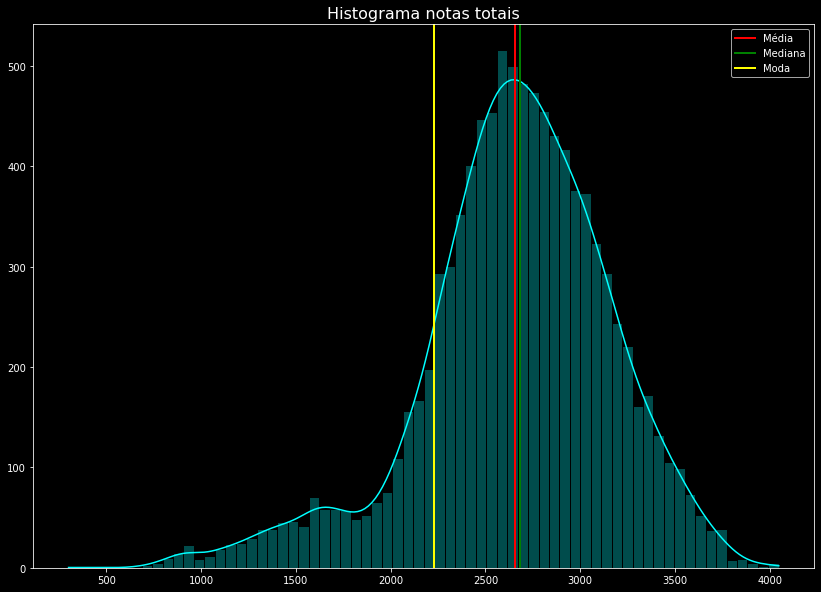

In [100]:
histplot(x=notas_sem_zero['NU_NOTA_TOTAL'], titulo="Histograma notas totais", cor='cyan')

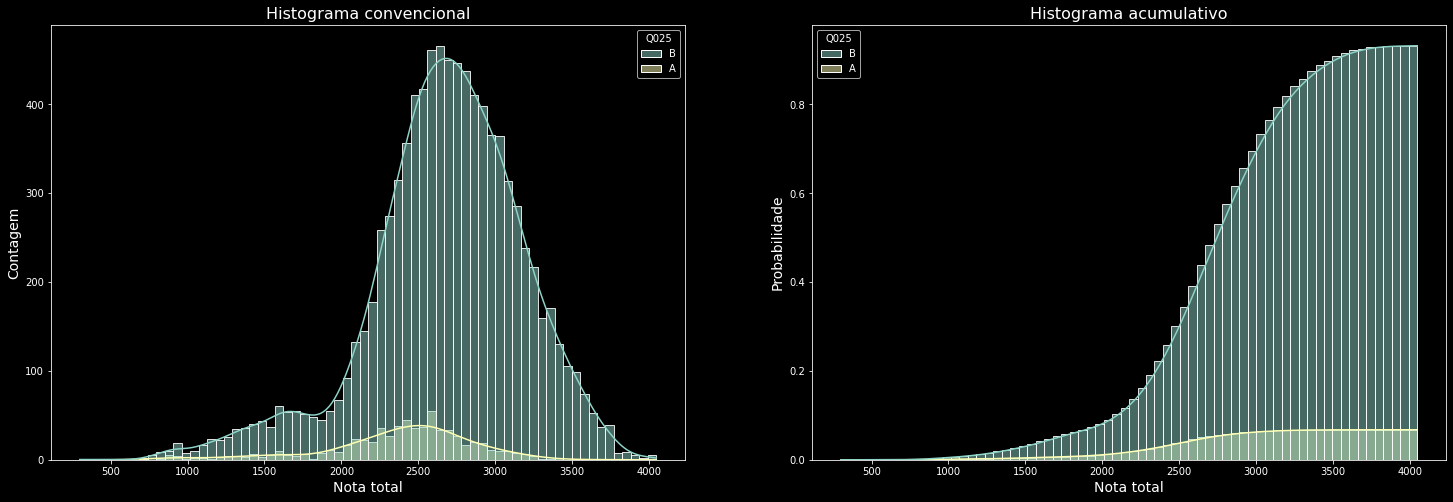

In [101]:
plt.figure(figsize=(25,8))
plt.subplot(1, 2, 1)
sns.histplot(notas_sem_zero, x='NU_NOTA_TOTAL', hue='Q025', kde=1, color='cyan')
plt.ylabel("Contagem", fontsize=14)
plt.xlabel("Nota total", fontsize=14)
plt.title("Histograma convencional", fontsize=16)
#
plt.subplot(1, 2, 2)
sns.histplot(notas_sem_zero, x='NU_NOTA_TOTAL', hue='Q025', kde=1, stat='probability', cumulative=True, color='yellow')
plt.ylabel("Probabilidade", fontsize=14)
plt.xlabel("Nota total", fontsize=14)
plt.title("Histograma acumulativo", fontsize=16)
plt.show()

# Correlações das variáveis

In [102]:
correlacao = notas_sem_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.682422,0.679182,0.638602,0.523498,0.801107
NU_NOTA_CH,0.682422,1.000000,0.625875,0.760690,0.558737,0.733252
NU_NOTA_MT,0.679182,0.625875,1.000000,0.602156,0.514489,0.808283
NU_NOTA_LC,0.638602,0.760690,0.602156,1.000000,0.550755,0.699052
NU_NOTA_REDACAO,0.523498,0.558737,0.514489,0.550755,1.000000,0.768742
NU_NOTA_TOTAL,0.801107,0.733252,0.808283,0.699052,0.768742,1.000000


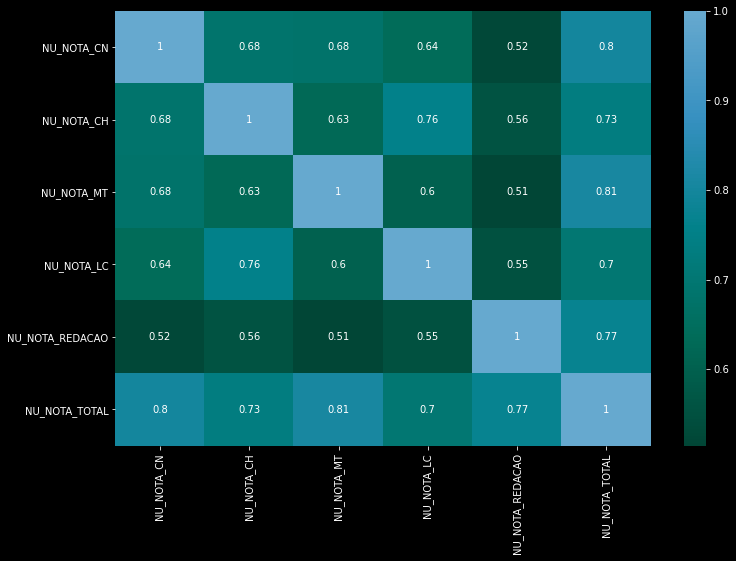

In [103]:
plt.subplots(figsize=(12,8))
sns.heatmap(correlacao, annot=True, center = 1, cmap="PuBuGn_r")
plt.show()

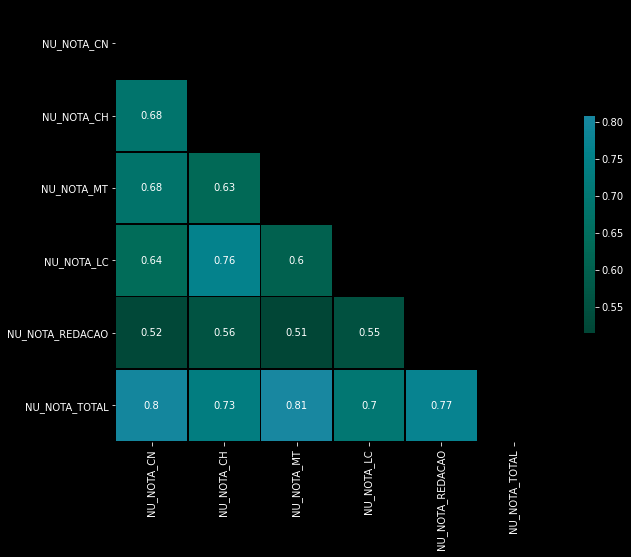

In [104]:
f, ax = plt.subplots(figsize=(12, 8))
mask = np.triu(np.ones_like(correlacao, dtype=bool))
sns.heatmap(correlacao, mask=mask, linecolor ="black", center=1, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap="PuBuGn_r")
plt.show()

# Modelos

## Construção do modelo

In [105]:
novo_treino = notas_sem_zero.copy()

In [106]:
df = novo_treino[['NU_NOTA_TOTAL', 'NU_NOTA_MT', 'NU_NOTA_LC','NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_REDACAO']]

In [107]:
(df.isnull().sum() / len(treino))*100

NU_NOTA_TOTAL      0.000000
NU_NOTA_MT         4.698506
NU_NOTA_LC         0.147070
NU_NOTA_CN         4.698506
NU_NOTA_CH         0.147070
NU_NOTA_REDACAO    0.147070
dtype: float64

In [108]:
df['NU_NOTA_MT'].fillna(df['NU_NOTA_MT'].mean(),inplace=True)
df['NU_NOTA_LC'].fillna(df['NU_NOTA_LC'].mean(),inplace=True)
df['NU_NOTA_CN'].fillna(df['NU_NOTA_CN'].mean(),inplace=True)
df['NU_NOTA_CH'].fillna(df['NU_NOTA_CH'].mean(),inplace=True)
df['NU_NOTA_REDACAO'].fillna(df['NU_NOTA_REDACAO'].mean(),inplace=True)

In [112]:
y = df["NU_NOTA_TOTAL"].copy()
x = df.drop("NU_NOTA_TOTAL", axis=1)

In [113]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

In [114]:
# Transformando treino e teste para escala entre 0 e 1

sc = StandardScaler()  

## XGBoost

In [115]:
xgb_reg = xgb.XGBRegressor()

In [116]:
pipeline_xgb = Pipeline([('transformacao', sc), ('estimador', xgb_reg)])

In [117]:
parametros_xgb = {
              "estimador__learning_rate": [0.05,0.1],
              "estimador__max_depth": [4,5,6],
              "estimador__n_estimators": [6000,7200]
              }
XGB = GridSearchCV(pipeline_xgb, cv=KFold(n_splits = 5, shuffle=True), param_grid=parametros_xgb, scoring='r2')
XGB.fit(x_treino, y_treino)
melhor_estimador_XGB = XGB.best_estimator_

[20:13:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:13:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:15:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [118]:
XGB.best_score_

0.998579205399829

In [119]:
melhor_estimador_XGB

Pipeline(memory=None,
         steps=[('transformacao',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimador',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.05,
                              max_delta_step=0, max_depth=4, min_child_weight=1,
                              missing=None, n_estimators=7200, n_jobs=1,
                              nthread=None, objective='reg:linear',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1))],
         verbose=False)

In [120]:
previsoes_XGB = XGB.predict(x_teste)

In [121]:
# R2 score - Erro quadrado

acuracia_XGB_r2 = r2_score(y_teste, previsoes_XGB)
print("A acurácia do algoritmo pela métrica R2 é : {}".format(round(acuracia_XGB_r2,4)))

A acurácia do algoritmo pela métrica R2 é : 0.9992


In [122]:
# RSME - Raiz quadrada do erro médio quadrado 
## MAIOR PENALIDADE PARA ERROS GRANDES
## Mais impactado por outliers

acuracia_XGB_rsme = np.sqrt(mean_squared_error(y_teste, previsoes_XGB))
print("A acurácia do algoritmo pela métrica RSME é : {}".format(round(acuracia_XGB_rsme,4)))

A acurácia do algoritmo pela métrica RSME é : 14.0152


In [123]:
# MSLE - Raiz quadrada do erro médio logarítmo quadrado
## Não pode ser negativo
## Não se importa com a diferença absoluta, MSLE se importa com a diferença relativa

acuracia_XGB_msle = mean_squared_log_error(y_teste, previsoes_XGB)
print("A acurácia do algoritmo pela métrica MSLE é : {}".format(round(acuracia_XGB_msle,6)))

A acurácia do algoritmo pela métrica MSLE é : 4.6e-05
